### Naive Bayes Classifier for Digit Recognition (35%)

In [9]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
#from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [10]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
from sklearn.datasets import load_digits
mnist = load_digits()
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)


# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[1540:], Y[1540:]
dev_data, dev_labels = X[1400:1540], Y[1400:1540]
train_data, train_labels = X[:1400], Y[:1400]
mini_train_data, mini_train_labels = X[:200], Y[:200]

data shape:  (1797, 64)
label shape: (1797,)


In [11]:
print('The Feature set:', X)
print('The Label set:', Y)

The Feature set: [[0.         0.         0.04313725 ... 0.05098039 0.0627451  0.03137255]
 [0.         0.00392157 0.05882353 ... 0.00392157 0.         0.        ]
 [0.         0.00784314 0.05098039 ... 0.0627451  0.0627451  0.01176471]
 ...
 [0.         0.         0.01960784 ... 0.         0.         0.        ]
 [0.         0.         0.01568627 ... 0.         0.         0.        ]
 [0.         0.         0.02352941 ... 0.04313725 0.         0.        ]]
The Label set: [2 8 2 ... 7 7 8]


### A. Create a 10x10 grid to visualize 10 examples of each digit.

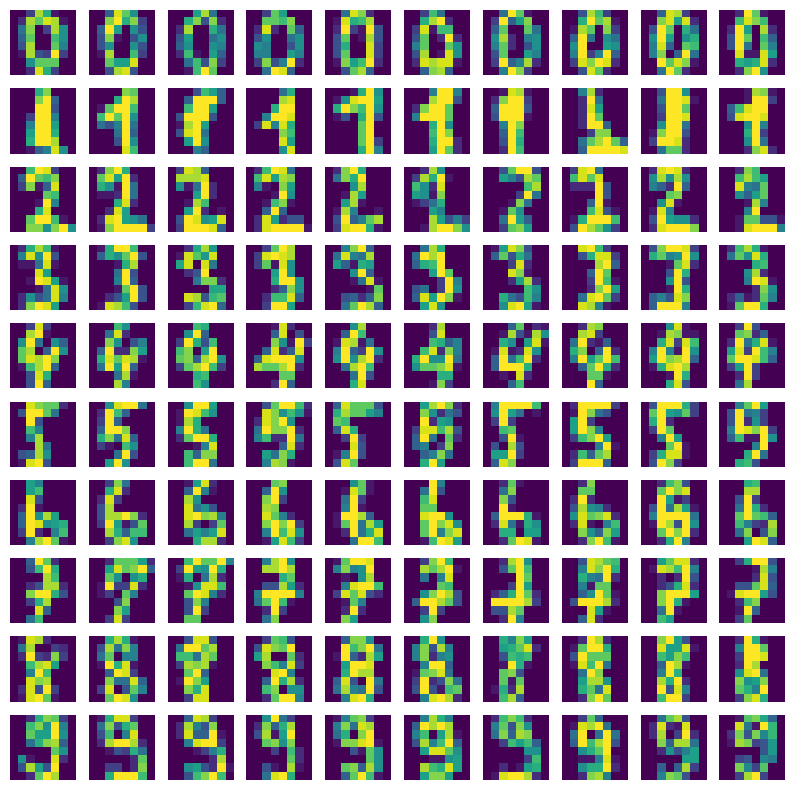

In [12]:
digits = np.unique(Y)
M = 10
dim = int(np.sqrt(X.shape[1]))

fig, axs = plt.subplots(len(digits), M, figsize=(10,10))

for i,d in enumerate(digits):
    for j in range(M):
        axs[i,j].imshow(X[Y==d][j].reshape((dim,dim)))
        axs[i,j].axis('off')

### B.  Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?
### Note, the answers may vary depending on what thresholds you set.

### BernoulliNB

In [13]:
# Initialize variables 
best_accuracy = 0
best_thresholds = None

# Iterate over possible threshold pairs between 0 and 1
for thresh in np.arange(0.01, 1, 0.01):

        # Change feature values to 0, 1 
        bins = [thresh]
        X_binary = np.digitize(train_data, bins=bins)
        dev_data_binary = np.digitize(dev_data, bins=bins)
        
        # Fit the BernoulliNB on the bin 
        bernoulli_nb = BernoulliNB()
        bernoulli_nb.fit(X_binary, train_labels)
        
        # Accuracy on dev data
        dev_pred_test = bernoulli_nb.predict(dev_data_binary)
        test_accuracy = accuracy_score(dev_labels, dev_pred_test)
        
        # Find best accuracy and thresholds
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_thresholds = thresh

print(f"Best accuracy: {best_accuracy}")
print(f"Best thresholds: {best_thresholds}")

Best accuracy: 0.9071428571428571
Best thresholds: 0.02


### MultinomialNB

In [14]:
# Initialize variables
best_accuracy = 0
best_thresholds = None

# Iterate over two possible threshold pairs between 0 and 1
for thresh1 in np.arange(0.01, 1, 0.01):    
    for thresh2 in np.arange(thresh1 + 0.01, 1.0, 0.01): 

        # Change feature values to 0, 1, 2
        bins = [thresh1, thresh2]
        X_multi_test = np.digitize(train_data, bins=bins)
        dev_data_multi_test = np.digitize(dev_data, bins=bins)
        
        # Fit the MultinomialNB
        multinomial_nb_test = MultinomialNB()
        multinomial_nb_test.fit(X_multi_test, train_labels)
        
        # Accuracy on dev data
        dev_pred_test = multinomial_nb_test.predict(dev_data_multi_test)
        test_accuracy = accuracy_score(dev_labels, dev_pred_test)
        
        # Find best accuracy and thresholds
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_thresholds = (thresh1, thresh2)

print(f"Best accuracy: {best_accuracy}")
print(f"Best thresholds: {best_thresholds}")

Best accuracy: 0.9071428571428571
Best thresholds: (0.01, 0.039999999999999994)


In [15]:
print(dev_data.shape)

(140, 64)


The above loops iterate through threshold ranges to test for the best accuracy amongst the naive bayes models. Bernoulli naive bayes tests for a single threshold for the binary tranformation of the training dataset and the validation/dev dataset. Multinomial naive bayes tests for two threshold for the tranformation into three bins of 0, 1, 2  of the training dataset and the validation/dev dataset. By testing for thresholds both of the models have a high accuracy of 0.9071428571428571, indicating high performance, but not an improvement. This might be due to the small validation/dev data size of only 140 indexes, therefore there is not enough data to demonstarte a difference. However, generally speaking multinomial naive bayes should outpreform bernoulli naive bayes due to the information loss with just seperating pixel intensity into two levels rather three or potenially more. Because the dataset deals with image data, potentially models such as SVM and neural networks might be a better fit.

### C. Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Could you explain why?

In [17]:
# Gaussian Naive Bayes model
gaussian_nb = GaussianNB()

# Train the model on the train set
gaussian_nb.fit(train_data, train_labels)

# Evaluate on the dev data
dev_pred = gaussian_nb.predict(dev_data)
dev_accuracy = accuracy_score(dev_labels, dev_pred)
print(f"GaussianNB Accuracy: {dev_accuracy:.4f}")

GaussianNB Accuracy: 0.8429


The GaussianNB model has an accuracy of 0.8429m less than the other naive bayes models. GaussianNB is intended for real-valued features, making it not quite a good fit for image classifcation data. Gaussian naive bayes assumes a gaussian distribution amongst its features, as is intended for real value features, but that is not neccessarily the case for image data relating to pixel intensity values. Gaussian naive bayes also assumes feature independence between its features, but image data features is potentially very correlated between each other.